In [1]:
import pandas as pd

data = pd.read_csv('penguins (1).csv')

In [2]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [67]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,3.320000e+02,3.320000e+02,3.320000e+02,332.000000,3.320000e+02
mean,-4.280378e-16,8.560756e-17,8.025709e-16,0.000000,-2.568227e-16
std,1.001509e+00,1.001509e+00,1.001509e+00,1.001509,1.001509e+00
min,-2.189667e+00,-2.070694e+00,-2.067519e+00,-1.871059,-1.006042e+00
25%,-8.304338e-01,-7.934376e-01,-7.831643e-01,-0.815350,-1.006042e+00
50%,1.247034e-01,7.509650e-02,-2.836929e-01,-0.225395,9.939939e-01
75%,8.456482e-01,7.903599e-01,8.579560e-01,0.713876,9.939939e-01
max,2.861539e+00,2.220887e+00,2.142311e+00,2.600180,9.939939e-01


# EDA

In [3]:
data.dropna(inplace=True)

In [4]:
data['sex'].value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [5]:
male = data[data.sex=='MALE'].copy()
female = data[data.sex=='FEMALE'].copy()

data = pd.concat([male,female],ignore_index=True)

In [6]:
data['sex'].value_counts()

sex
MALE      169
FEMALE    165
Name: count, dtype: int64

<Axes: ylabel='flipper_length_mm'>

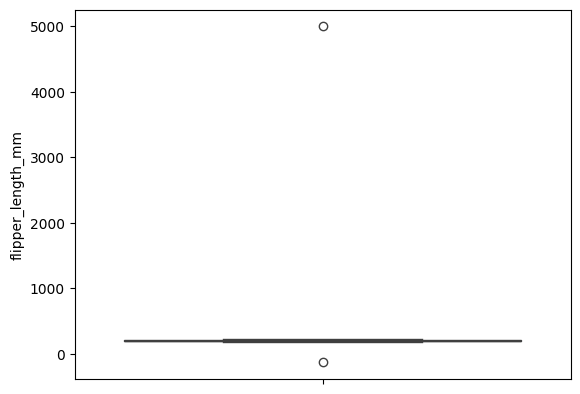

In [7]:
import seaborn as sns


sns.boxplot(data=data['flipper_length_mm'])

10 - 60

10 20 q1

50 - 60 q3

10 20-25 40-45 80

In [8]:
import numpy as np
Q1 = data['flipper_length_mm'].quantile(0.25)
Q3 = data['flipper_length_mm'].quantile(0.75)

IQR = Q3-Q1

Lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5*IQR

Lower_array = np.where(data['flipper_length_mm']<Lower)[0]
Upper_array = np.where(data['flipper_length_mm']>Upper)[0]

data.drop(index=Lower_array,inplace=True)
data.drop(index=Upper_array,inplace=True)


In [9]:
data.reset_index(drop=True,inplace=True)

In [10]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.3,20.6,190.0,3650.0,MALE
2,39.2,19.6,195.0,4675.0,MALE
3,38.6,21.2,191.0,3800.0,MALE
4,42.5,20.7,197.0,4500.0,MALE


<Axes: ylabel='flipper_length_mm'>

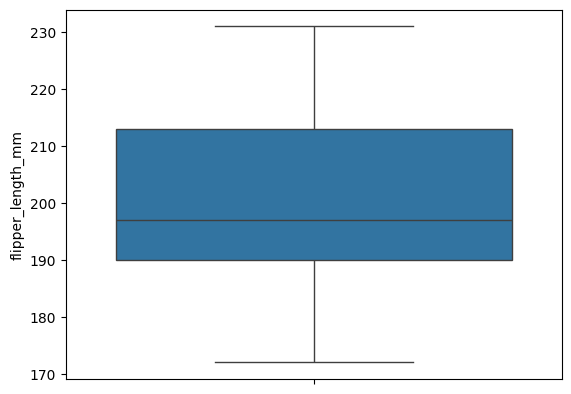

In [11]:
sns.boxplot(data=data['flipper_length_mm'])

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['sex']= encoder.fit_transform(data['sex'])

In [13]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.3,20.6,190.0,3650.0,1
2,39.2,19.6,195.0,4675.0,1
3,38.6,21.2,191.0,3800.0,1
4,42.5,20.7,197.0,4500.0,1


In [14]:
col = data.columns

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = scaler.fit_transform(data)

data = pd.DataFrame(data,columns=col)

In [16]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.867170,1.761074,-0.783164,-0.691149,0.993994
2,-0.885538,1.250172,-0.426399,0.581912,0.993994
3,-0.995746,2.067616,-0.711811,-0.504847,0.993994
4,-0.279393,1.812165,-0.283693,0.364560,0.993994


# PCA

PCA

explained variance ratio 0.8 / 0.9

5 -> 100% dataset

4 -> ?% dataset

3 -> ?% dataset

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(data)

PCA(n_components=3)

In [31]:
nums = np.arange(len(data.columns))

variance_ratio = []

for num in nums:
    pca = PCA(n_components=num)
    pca.fit(data)
    variance_ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'variance_ratio')

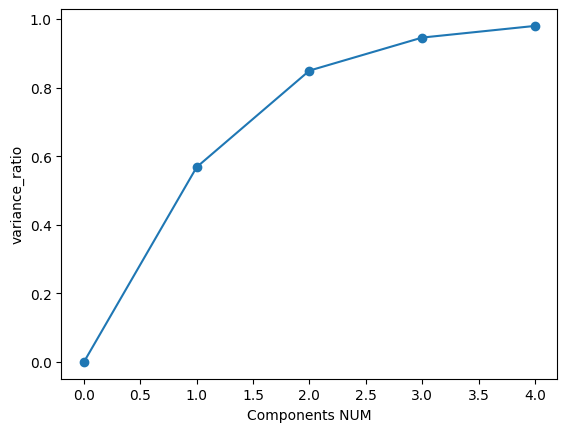

In [33]:
import matplotlib.pyplot as plt

plt.plot(nums,variance_ratio,marker='o')
plt.xlabel('Components NUM')
plt.ylabel('variance_ratio')

In [34]:
pca = PCA(n_components=2)

data2 = pca.fit_transform(data)

K means dua method

Elbow

Silhouette

In [36]:
from sklearn.cluster import KMeans

inertia = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i).fit(data2)
    inertia.append(kmeans.inertia_)

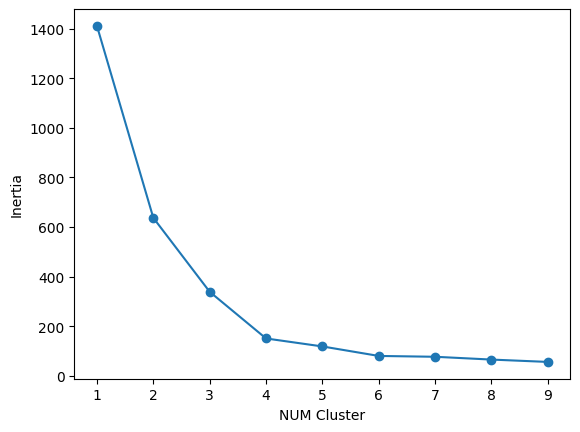

In [37]:
plt.plot(range(1,10),inertia,marker='o')
plt.ylabel('Inertia')
plt.xlabel('NUM Cluster')
plt.show()

In [40]:
from sklearn.metrics import silhouette_score

silhouette = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i).fit(data2)
    silhouette.append(silhouette_score(data2,kmeans.labels_))

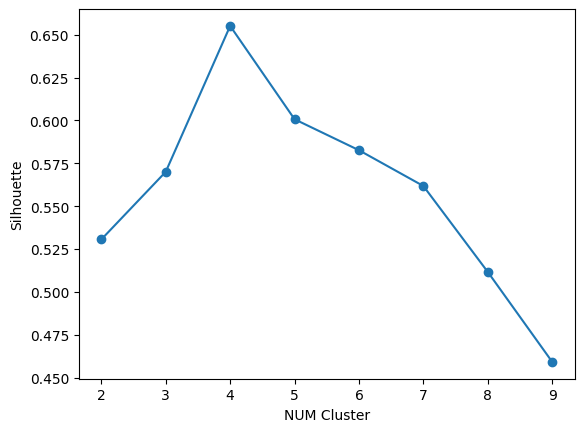

In [41]:
plt.plot(range(2,10),silhouette,marker='o')
plt.ylabel('Silhouette')
plt.xlabel('NUM Cluster')
plt.show()

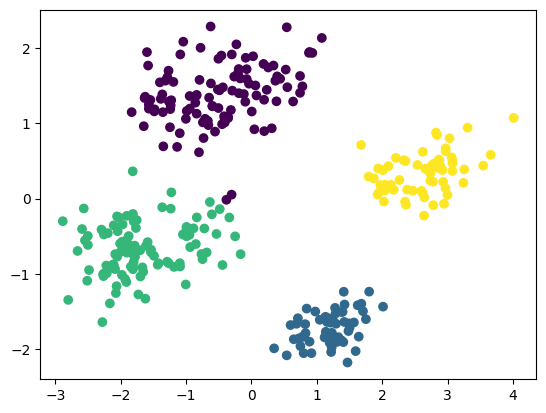

In [43]:
kmeans = KMeans(n_clusters=4).fit(data2)

plt.scatter(data2[:,0],data2[:,1],c = kmeans.labels_,cmap='viridis')
plt.show()

# PCA on steroid

In [44]:
pca = PCA(n_components=3)

data3 = pca.fit_transform(data)

In [45]:
data3.shape

(332, 3)

In [46]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(data3)

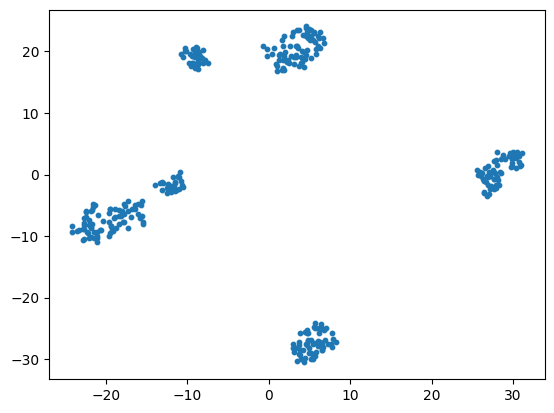

In [51]:
plt.scatter(tsne_features[:,0],tsne_features[:,1],s=10)

In [52]:
inertia = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i).fit(data3)
    inertia.append(kmeans.inertia_)

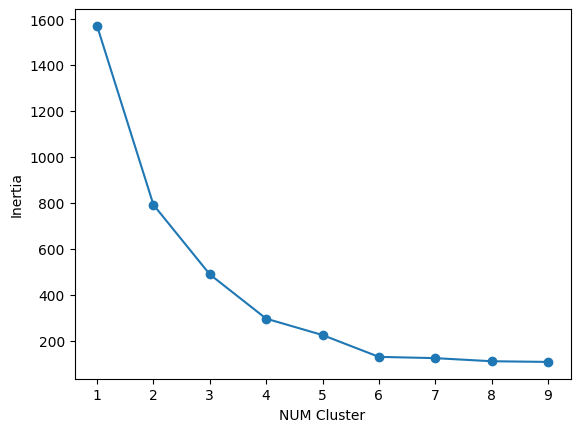

In [53]:
plt.plot(range(1,10),inertia,marker='o')
plt.ylabel('Inertia')
plt.xlabel('NUM Cluster')
plt.show()

In [54]:
silhouette = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i).fit(data3)
    silhouette.append(silhouette_score(data3,kmeans.labels_))

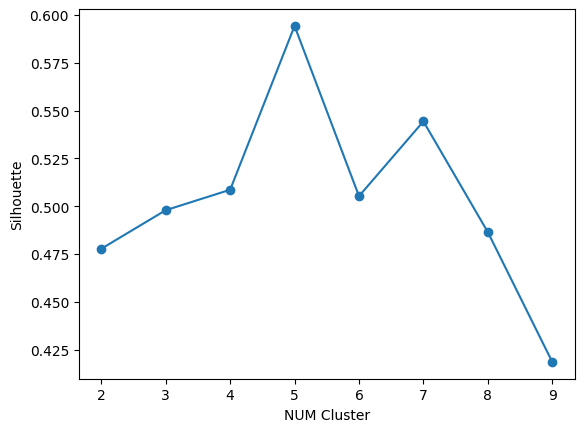

In [55]:
plt.plot(range(2,10),silhouette,marker='o')
plt.ylabel('Silhouette')
plt.xlabel('NUM Cluster')
plt.show()

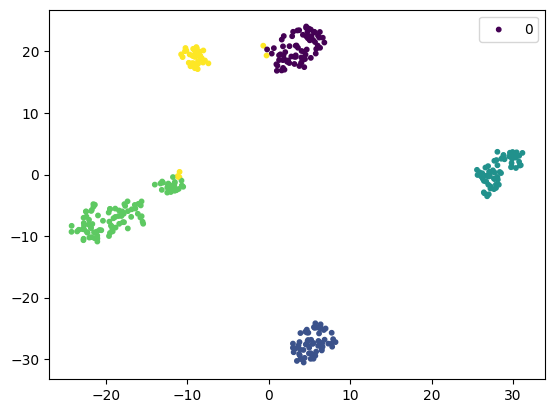

In [59]:
kmeans = KMeans(n_clusters=5).fit(data3)
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=kmeans.labels_,cmap='viridis',s=10)

<Axes: >

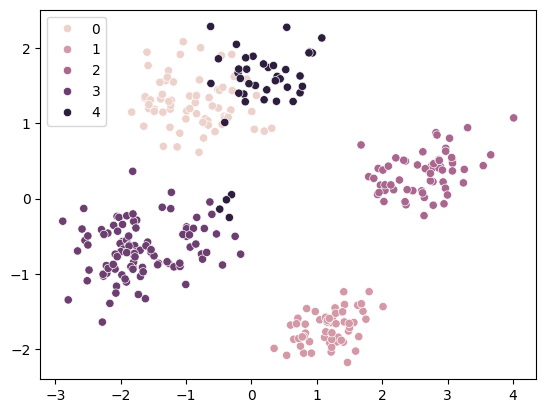

In [65]:
sns.scatterplot(x = data2[:,0], y = data2[:,1], hue = kmeans.labels_)

<Axes: >

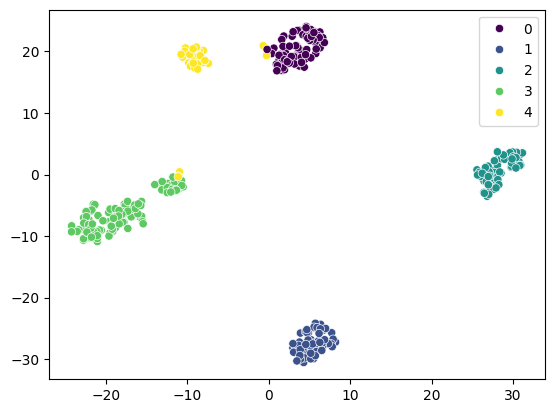

In [64]:
sns.scatterplot(x = tsne_features[:,0],y = tsne_features[:,1],hue=kmeans.labels_,palette='viridis')